# CSU Capstone Project  |  Lung Cancer Diagnosis Model

### Code Outline
   #### - Exploratory Data Analysis (EDA)
   #### - Optimize Data
   #### - Build Model

## 1. EDA

In [1]:
import pandas as pd

In [2]:
# Initialize Pandas Dataframe with lung cancer dataset
df = pd.read_csv("data/survey_lung_cancer.csv")
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


Within the dataset 2 is equal to yes and 1 is equal to no

In [3]:
# Shape of the dataframe: amount of rows and columns within the dataset
df.shape

(309, 16)

In [4]:
# Analyze the data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

Most all of the columns are integers, besides the GENDER and LUNG_CANCER columns being objects (most likely strings)

In [5]:
# Check for the amount of duplicates
sum(df.duplicated())

33

In [6]:
# Drop duplicates
df = df.drop_duplicates()
sum(df.duplicated())

0

In [7]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,62.909420,1.543478,1.576087,1.496377,1.507246,1.521739,1.663043,1.547101,1.547101,1.550725,1.576087,1.630435,1.467391,1.557971
std,8.379355,0.499011,0.495075,0.500895,0.500856,0.500435,0.473529,0.498681,0.498681,0.498324,0.495075,0.483564,0.499842,0.497530
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.500000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


Since all the columns are binary except AGE, I will preprocess them to 0s and 1s

In [8]:
# loop through every row in each binary int column
for i in df.iloc[:, 2:15]:
    df[i] = df[i].replace({2: 1, 1: 0})
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,0,1,1,0,0,1,0,1,1,1,1,1,1,YES
1,M,74,1,0,0,0,1,1,1,0,0,0,1,1,1,YES
2,F,59,0,0,0,1,0,1,0,1,0,1,1,0,1,NO
3,M,63,1,1,1,0,0,0,0,0,1,0,0,1,1,NO
4,F,63,0,1,0,0,0,0,0,1,0,1,1,0,0,NO


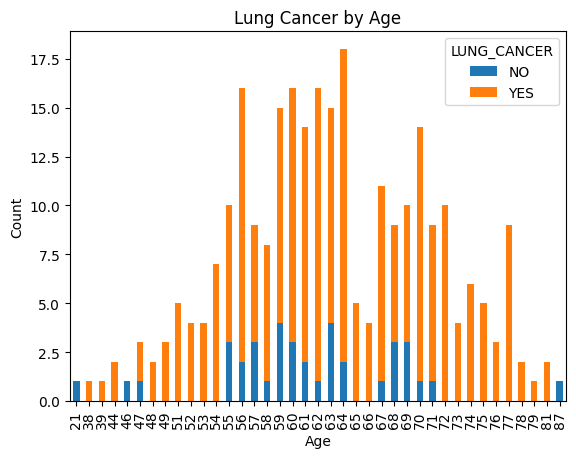

In [9]:
import matplotlib.pyplot as plt

# Creating a bar graph comparing age and the lung cancer diagnosis
df.groupby('AGE')['LUNG_CANCER'].value_counts().unstack().plot(kind='bar', stacked=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Lung Cancer by Age')
plt.show()

Positive and negative results are distrubted over the ages of the patients.

Although there is a larger amount of positive diagnosis represented in the dataset.

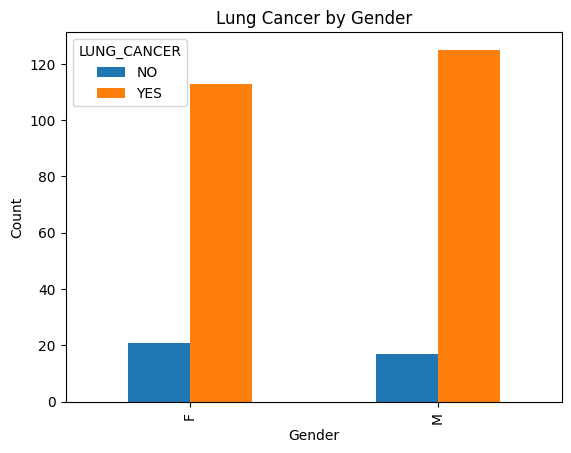

In [10]:
# Bar graph of lung cancer and gender
df.groupby('GENDER')['LUNG_CANCER'].value_counts().unstack().plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Lung Cancer by Gender')
plt.show()

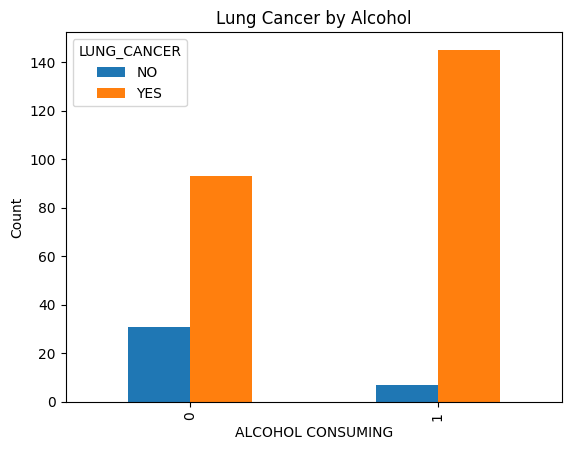

In [11]:
# Bar graph of lung cancer and alcohol consuming
df.groupby('ALCOHOL CONSUMING')['LUNG_CANCER'].value_counts().unstack().plot(kind='bar')
plt.xlabel('ALCOHOL CONSUMING')
plt.ylabel('Count')
plt.title('Lung Cancer by Alcohol')
plt.show()

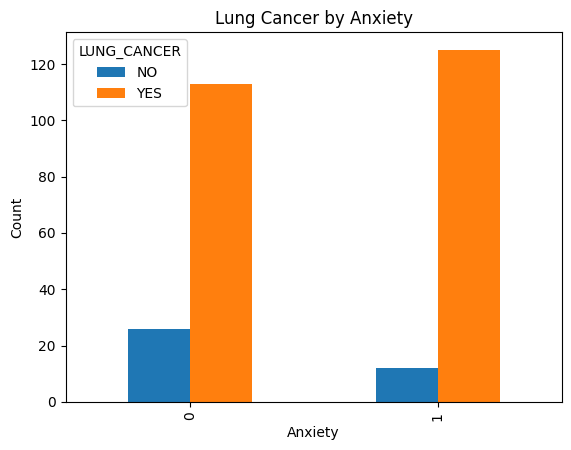

In [12]:
# Bar graph of lung cancer and anxiety
df.groupby('ANXIETY')['LUNG_CANCER'].value_counts().unstack().plot(kind='bar')
plt.xlabel('Anxiety')
plt.ylabel('Count')
plt.title('Lung Cancer by Anxiety')
plt.show()

## 2. Optimize Data

Convert object columns to integers

In [13]:
# Convert gender to binary data
df['GENDER'] = df['GENDER'].replace({'F': 0, 'M': 1})
df.GENDER

0      1
1      1
2      0
3      1
4      0
      ..
279    0
280    0
281    1
282    1
283    1
Name: GENDER, Length: 276, dtype: int64

In [14]:
# Convert diagnosis to binary data
df['LUNG_CANCER'] = df['LUNG_CANCER'].replace({'NO': 0, 'YES': 1})
df.LUNG_CANCER

0      1
1      1
2      0
3      0
4      0
      ..
279    1
280    0
281    0
282    0
283    1
Name: LUNG_CANCER, Length: 276, dtype: int64

In [15]:
# scale the age column for optimization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['AGE'] = scaler.fit_transform(df[['AGE']])

df.AGE

0      0.728176
1      1.325964
2     -0.467401
3      0.010830
4      0.010830
         ...   
279   -0.467401
280   -0.467401
281   -0.945632
282   -2.021652
283   -0.347844
Name: AGE, Length: 276, dtype: float64

In [16]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,0.728176,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,1.325964,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,-0.467401,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,0.010830,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,0.010830,0,1,0,0,0,0,0,1,0,1,1,0,0,0


In [ ]:
# Save scaler for front end
import pickle
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

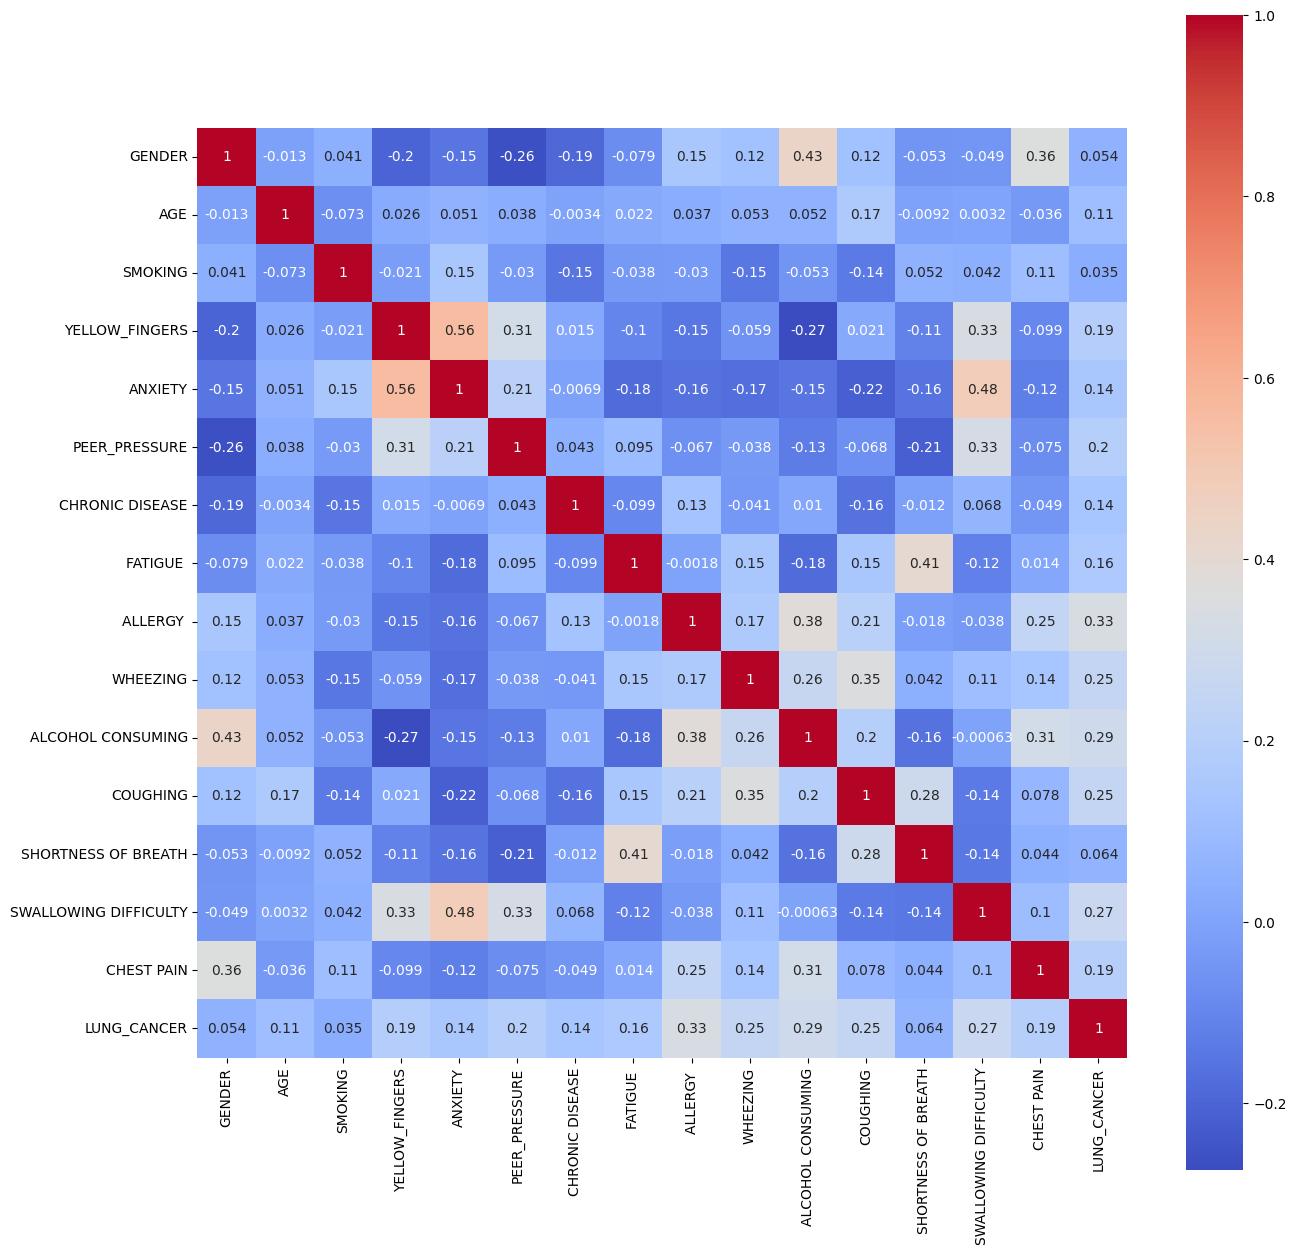

In [17]:
# Scaled EDA
# Correllation heatmap
import seaborn as sns

corr_matrix = df.corr()
plt.subplots(figsize=(15,15))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, square=True)
plt.show()


There seem to be weak and moderate correlations only. Some surprising lack of correlation with smoking and lung cancer. 

Anxiety seems to have a moderate correlation with swallowing difficulty and yellow fingers. 

It seems this dataset shows shortness of breat, gender and smoking have quite weak correlations to the lung cancer diagnosis.

In [18]:
# Split target feature
X = df.drop('LUNG_CANCER', axis=1)
y = df.LUNG_CANCER

In [19]:
len(X)

276

In [20]:
# Utilizing random over sampling to represent the minority target feature
from imblearn.over_sampling import RandomOverSampler

X_resampled, y_resampled = RandomOverSampler(random_state=42).fit_resample(X, y)

In [21]:
len(X_resampled)

476

In [22]:
# test and training data
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets, with 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


## 3. Build Model

 The model has 2 hidden layers with 32 and 16 neurons respectively, both using the ReLU activation function to introduce non-linearity. 
 
 The output layer has a single neuron with sigmoid activation function, as this is a binary classification problem. 
 
 The Dropout layers help prevent overfitting. The binary_crossentropy loss function is used, along with the adam optimizer. The model is trained for 50 epochs with a batch size of 32.

In [38]:
# Dependencies
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Build model
model = Sequential()

# Add layers
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)

Epoch 1/50
12/12 [==============================] - 1s 35ms/step - loss: 0.7079 - accuracy: 0.4947 - val_loss: 0.7096 - val_accuracy: 0.4583
Epoch 2/50
12/12 [==============================] - 0s 4ms/step - loss: 0.6718 - accuracy: 0.5105 - val_loss: 0.6821 - val_accuracy: 0.4688
Epoch 3/50
12/12 [==============================] - 0s 4ms/step - loss: 0.6435 - accuracy: 0.5658 - val_loss: 0.6592 - val_accuracy: 0.4688
Epoch 4/50
12/12 [==============================] - 0s 4ms/step - loss: 0.6282 - accuracy: 0.5658 - val_loss: 0.6391 - val_accuracy: 0.4688
Epoch 5/50
12/12 [==============================] - 0s 4ms/step - loss: 0.6085 - accuracy: 0.5737 - val_loss: 0.6182 - val_accuracy: 0.4688
Epoch 6/50
12/12 [==============================] - 0s 5ms/step - loss: 0.5935 - accuracy: 0.6316 - val_loss: 0.5953 - val_accuracy: 0.5938
Epoch 7/50
12/12 [==============================] - 0s 7ms/step - loss: 0.5822 - accuracy: 0.6553 - val_loss: 0.5728 - val_accuracy: 0.6667
Epoch 8/50
12/12 [=

Training loss is 0.1386 and training accuracy is 0.9605. Thus the model is making accurate predictions on the training data 96.05% of the time. 

The validation loss is 0.1915 and the validation accuracy is 0.9583. Thus the model is making accurate predictions on the validation data 95.83% of the time.

In [39]:
# get predicted labels
predicted_labels = model.predict(X_test)

3/3 [==============================] - 0s 2ms/step


In [41]:
# make predicted labels binaray
predicted_labels = (predicted_labels > 0.5).astype(int)

In [42]:
# sklearn model metrics
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, predicted_labels)
recall = recall_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Precision: 0.9761904761904762
Recall: 0.9318181818181818
F1 Score: 0.9534883720930233


In [31]:
from keras.utils import plot_model
from ann_visualizer.visualize import ann_viz

ann_viz(model, view = True, filename = "dnn.png", title="Diagnosis Neural Network")
#plot_model(model, to_file='lcd_neural_network.png', show_shapes=True)

In [43]:
model.save("lcd_model.h5")